# Diabetes Analysis

Sklearn can be very useful for data analysis in Python/Jupyter

## Information obtained from Kaggle

#### Project done by Miguel Estrada

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
#Importing the data
data_diabetes = pd.read_csv('diabetes.csv')
data_diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


<Axes: >

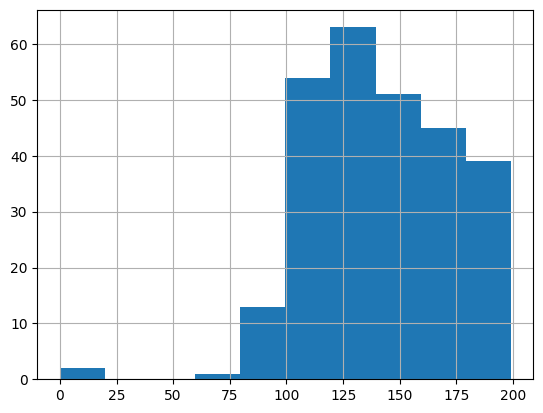

In [3]:
people_with_diabetes = data_diabetes[data_diabetes['Outcome'] == 1]
people_without_diabetes = data_diabetes[data_diabetes['Outcome'] == 0]
people_with_diabetes.Glucose.hist()

<Axes: >

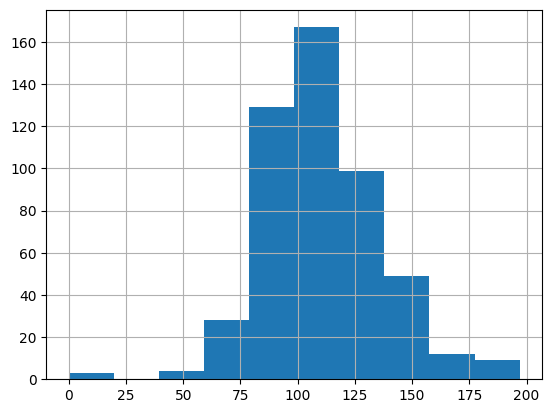

In [4]:
people_without_diabetes.Glucose.hist()

In [5]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Text(0.5, 1.0, 'Diabetes and Age')

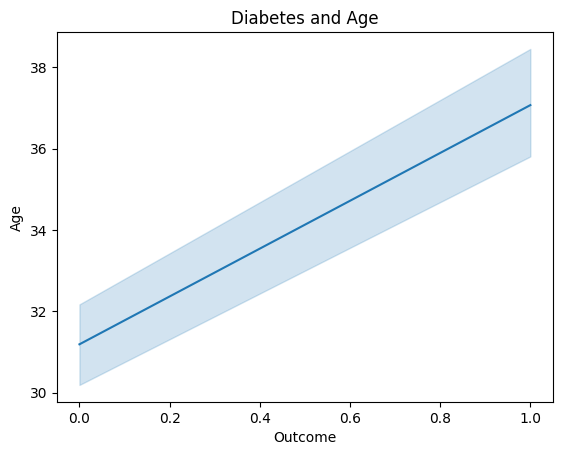

In [17]:
sns.lineplot(data=data_diabetes, x='Outcome', y='Age')
plt.title("Diabetes and Age")

<Axes: >

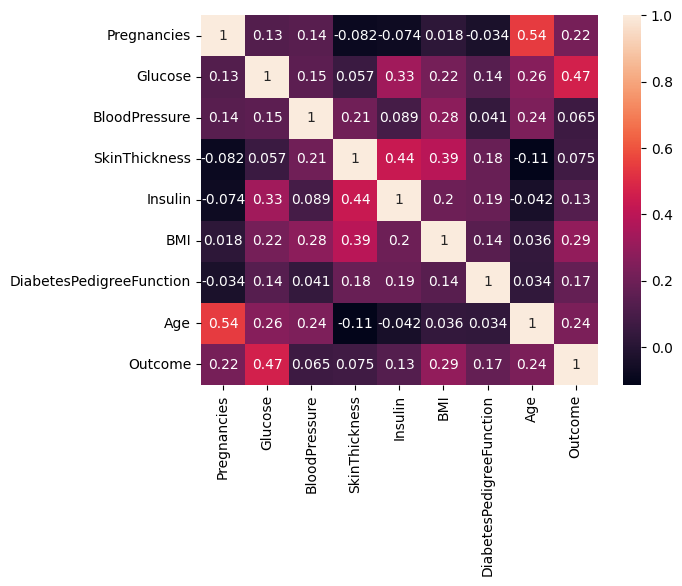

In [11]:
sns.heatmap(data_diabetes.corr(), annot=True)

# Analysis with all the variables
Trying to predict the 'outcome' which is Diabetes

In [18]:
X = data_diabetes.drop('Outcome', axis=1)
Y = data_diabetes['Outcome']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [20]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [21]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
predictions = classifier.predict(x_test)

<Axes: >

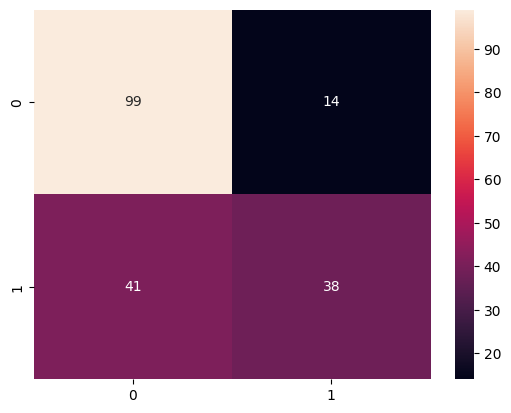

In [23]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [24]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.7135416666666666

# Analysis of only glucose

In [27]:
X = data_diabetes['Glucose'].astype('float')
Y = data_diabetes['Outcome'].astype('int')
X = np.array(X)
Y = np.array(Y)
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)

# reshaping the array from (500,) to (500, 1)
Y = Y.reshape(-1,1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [29]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

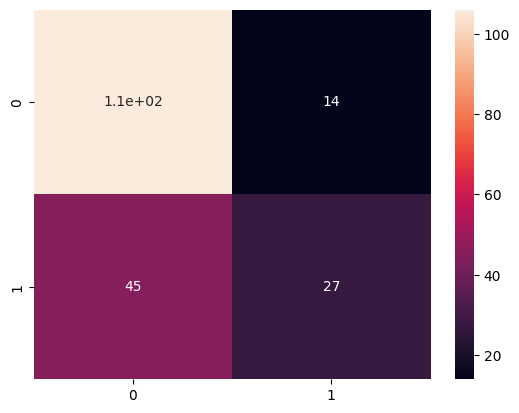

In [30]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [31]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.6927083333333334

## There is less accuracy when the analysis takes only glucose as a variables